___
# Introduction

Name : I Gusti Agung Istri Ratu Apsari Dewi

Batch : 02

Objectives : 
Predict default payment using optimum classifier model 
___

**Data Set Information:**  

This research aimed at the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients.   
___

**Attribute Information:**  

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:

LIMIT_BAL: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.

SEX: (1 = male; 2 = female).

EDUCATION : (1 = graduate school; 2 = university; 3 = high school; 4 = others).

MARRIAGE: Marital status (1 = married; 2 = single; 3 = others).

AGE: (year).

PAY_0 - PAY_6: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: PAY_0 = the repayment status in September, 2005; PAY_2 = the repayment status in August, 2005; . . .;PAY_6 = the repayment status in April, 2005. 

The measurement scale for the repayment status is: -2= no consumption, -1 = pay duly; 0 = the use of revolving credit ; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.

BIL_AMT1-BIL_AMT6: Amount of bill statement (NT dollar). BIL_AMT1 = amount of bill statement in September, 2005; BIL_AMT2 = amount of bill statement in August, 2005; . . .; BIL_AMT6 = amount of bill statement in April, 2005.

PAY_AMT1-PAY_AMT6: Amount of previous payment (NT dollar). PAY_AMT1 = amount paid in September, 2005; PAY_AMT2 = amount paid in August, 2005; . . .;PAY_AMT6 = amount paid in April, 2005.

___

In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import pandas as pd
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import seaborn as sns


# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "unsupervised_learning"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
import xgboost
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier    

In [ ]:
sklearn.__version__

'0.22.2.post1'

In [ ]:
# !pip uninstall scikit-learn
# !ypip install scikit-learn==0.24.2

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report,roc_auc_score
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [ ]:
df = pd.read_csv("UCI_Credit_Card.csv")
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [ ]:
df.duplicated().sum()

0

In [ ]:
for col in df.columns:
  print(col,"==>",df[col].unique())

ID ==> [    1     2     3 ... 29998 29999 30000]
LIMIT_BAL ==> [  20000.  120000.   90000.   50000.  500000.  100000.  140000.  200000.
  260000.  630000.   70000.  250000.  320000.  360000.  180000.  130000.
  450000.   60000.  230000.  160000.  280000.   10000.   40000.  210000.
  150000.  380000.  310000.  400000.   80000.  290000.  340000.  300000.
   30000.  240000.  470000.  480000.  350000.  330000.  110000.  420000.
  170000.  370000.  270000.  220000.  190000.  510000.  460000.  440000.
  410000.  490000.  390000.  580000.  600000.  620000.  610000.  700000.
  670000.  680000.  430000.  550000.  540000. 1000000.  530000.  710000.
  560000.  520000.  750000.  640000.   16000.  570000.  590000.  660000.
  720000.  327680.  740000.  800000.  760000.  690000.  650000.  780000.
  730000.]
SEX ==> [2 1]
EDUCATION ==> [2 1 3 5 4 6 0]
MARRIAGE ==> [1 2 3 0]
AGE ==> [24 26 34 37 57 29 23 28 35 51 41 30 49 39 40 27 47 33 32 54 58 22 25 31
 46 42 43 45 56 44 53 38 63 36 52 48 55 60 50 75

Dataset contains 30,000 customer cases, with no missing values and no duplicate values. Sex, education, age and payment status is in categorical data type. Other data is in numerical data type with wide range.

However, there are some labels that is not in data description:
1. Education : 5, 6, and 0 is not described yet, so we will replace it into 4 which means 'others'.
2. Marriage : marital status 0 is not described yet, so we will replace it into 3 which belongs to 'others'.
3. Payment status : PAY_0 is going to be replaced by PAY_1 in line with other payment variable done in September 2005 such as bill amount and pay amount.
4. Target attribute : Default payment next month is a long attribute name to type, so we wil replace it as DEF_PAY.


# Data Cleaning

**1. Rename attribute**

In [ ]:
# create a copy of dataframe so it will not change the original dataset
data = df.copy()

In [ ]:
data = data.rename(columns={'default.payment.next.month':'DEF_PAY','PAY_0':'PAY_1'})
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEF_PAY
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


**2. Replace category in Education**

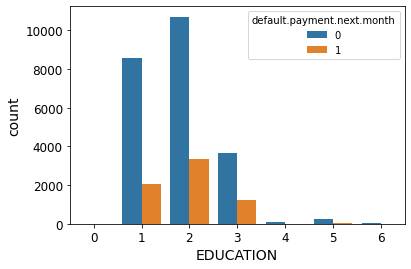

In [ ]:
sns.countplot(data=df, x='EDUCATION', hue='default.payment.next.month')

As seen in above graph, education class 4, 5, 6, and 0 is quite low compared to the three other class (1,2,3). We will input unknown class inside other category(class 4).

In [ ]:
data['EDUCATION'].replace({5:4, 6:4, 0:4}, inplace=True)

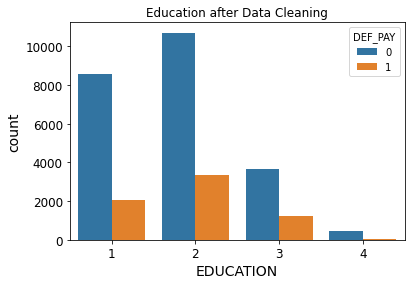

In [ ]:
sns.countplot(data=data, x='EDUCATION', hue='DEF_PAY')
plt.title("Education after Data Cleaning")
plt.show()

**3. Replace Marital Status**

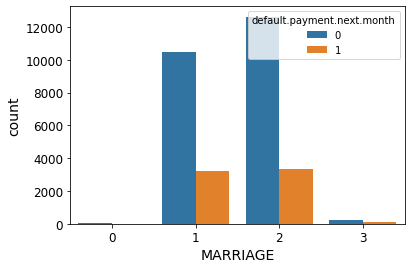

In [ ]:
sns.countplot(data=df, x='MARRIAGE', hue='default.payment.next.month')

In [ ]:
data['MARRIAGE'].replace({0:3}, inplace=True)

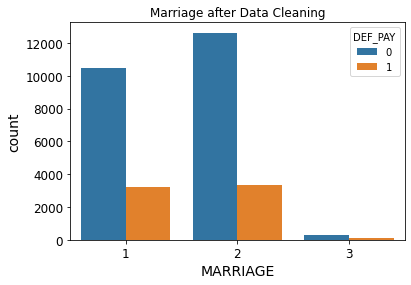

In [ ]:
sns.countplot(data=data, x='MARRIAGE', hue='DEF_PAY')
plt.title("Marriage after Data Cleaning")
plt.show()

# Exploratory Data Analysis

**1. Descriptive Statistic**

In [ ]:
data[['LIMIT_BAL','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']].describe()

,LIMIT_BAL,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,167484.322667,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,129747.661567,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,10000.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,50000.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,140000.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,240000.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,1000000.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


* Balance limit and bill amount features not showing normal distribution, mean and Q2 is not on the same point. However, there is no anomaly detected in above summary.
* There are some bill amount that is minus, we need to further check the payment pattern.

In [ ]:
data[['AGE','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']].describe()

,AGE,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,35.485500,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,9.217904,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,21.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,28.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,34.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,41.000000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,79.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


* Age is normally distributed, average and median age is around 34-35 years old.
* Pay amount features not showing normal distribution, mean and Q2 is not on the same point. However, there is no anomaly detected in above summary.

**2. Default Payment**

Saving figure Default Payment


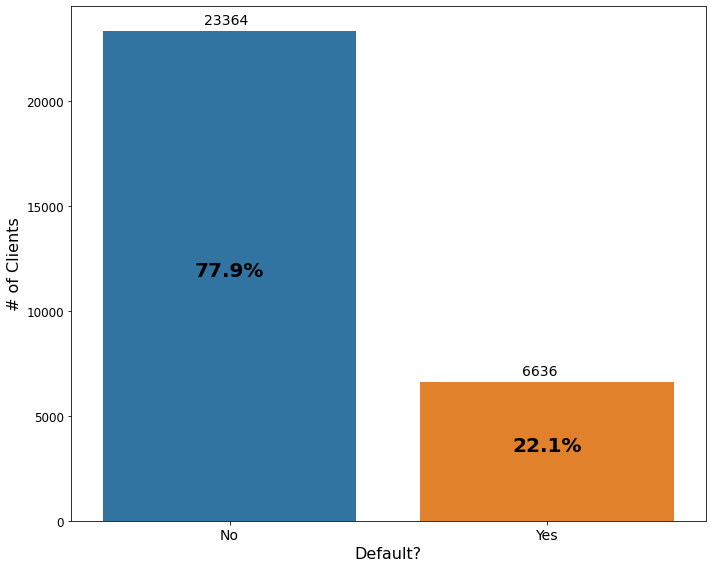

In [ ]:
plt.figure(figsize=(10,8))

ax = sns.countplot(data=data, x="DEF_PAY")
plt.xlabel("Default?", fontsize=16)
plt.ylabel("# of Clients", fontsize=16)
plt.xticks([0,1],['No','Yes'], fontsize=14)

for p in ax.patches:
  ax.annotate((p.get_height()), (p.get_x()+0.32, p.get_height()+300), size = 14)
  ax.text(x = p.get_x() + p.get_width()/2, y = p.get_height()/2, 
            s = f"{np.round(p.get_height()/len(data)*100, 1)}%", 
            ha = 'center', size = 20, rotation = 0, weight = 'bold' ,color = 'Black')

save_fig("Default Payment")
plt.show()  

Default payment in this case is 22.1% of Total Credit. Let's check on default payment based on their payment status in the latest month (September 2005).

**3. Non Performing Loan**

In [ ]:
data['PAY_1_NEW'] = data['PAY_1'].copy()
data['PAY_1_NEW'].replace({4:3, 5:3, 6:3, 7:3, 8:3}, inplace=True)

Saving figure Repayment Status in September 2015


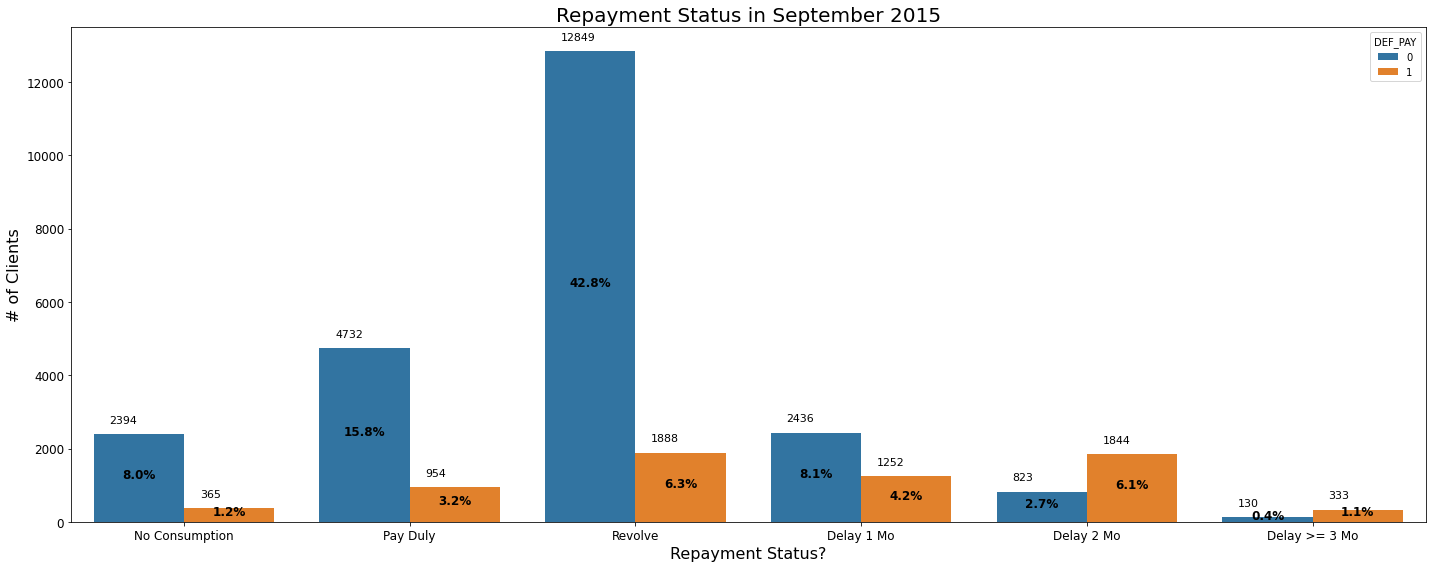

In [ ]:
plt.figure(figsize=(20,8))

ax = sns.countplot(data=data, x='PAY_1_NEW', hue='DEF_PAY')

plt.xlabel("Repayment Status?", fontsize=16)
plt.ylabel("# of Clients", fontsize=16)
plt.xticks([0,1,2,3,4,5],['No Consumption','Pay Duly', 'Revolve','Delay 1 Mo','Delay 2 Mo','Delay >= 3 Mo'], fontsize=12)

for p in ax.patches:
  ax.annotate((p.get_height()), (p.get_x()+0.07, p.get_height()+300), size = 11)
  ax.text(x = p.get_x() + p.get_width()/2, y = p.get_height()/2, 
            s = f"{np.round(p.get_height()/len(data)*100, 1)}%", 
            ha = 'center', size = 12, rotation = 0, weight = 'bold' ,color = 'Black')
  
plt.title("Repayment Status in September 2015", fontsize=20)
save_fig("Repayment Status in September 2015")
plt.show()

In [ ]:
npl = data[(data['DEF_PAY']==1) & (data['PAY_1']>=3)]

print("Non Performing Loans Ratio in September 2005 : {}% (Taiwan DB NPL = 2.80%)".format(len(npl)/len(data['PAY_1'])*100))

# source: https://www.ceicdata.com/en/taiwan/condensed-financial-structure-domestic-banks/db-all-non-performing-loan-ratios

Non Performing Loans Ratio in September 2005 : 1.11% (Taiwan DB NPL = 2.80%)


A nonperforming loan (NPL) is a loan in which the borrower is default and hasn't made any scheduled payments of principal or interest for some time.
In banking, commercial loans are considered nonperforming if the borrower is 90 days past due.

Generally, non-performing loans are considered bad debts because the chances of recovering the defaulted loan repayments are minimal. However, having more non-performing loans in the company’s balance hurts the bank’s cash flows, as well as its stock price. Predicting default could help bank handling potential NPL in the future. 

**4. Amount of Non Performing Loan in ND Taiwan (by month)**

In [ ]:
NPL_Sep = len(data[(data['PAY_1']>=3)&(data['DEF_PAY']==1)])
NPL_Aug = len(data[(data['PAY_2']>=3)&(data['DEF_PAY']==1)])
NPL_Jul = len(data[(data['PAY_3']>=3)&(data['DEF_PAY']==1)])
NPL_Jun = len(data[(data['PAY_4']>=3)&(data['DEF_PAY']==1)])
NPL_May = len(data[(data['PAY_5']>=3)&(data['DEF_PAY']==1)])
NPL_Apr = len(data[(data['PAY_6']>=3)&(data['DEF_PAY']==1)])

Case_Sep = len(data['PAY_1'])
Case_Aug = len(data['PAY_2'])
Case_Jul = len(data['PAY_3'])
Case_Jun = len(data['PAY_4'])
Case_May = len(data['PAY_5'])
Case_Apr = len(data['PAY_6'])

NPL_dat = pd.DataFrame([['April',Case_Apr,NPL_Apr,NPL_Apr/Case_Apr*100],
                        ['May',Case_May,NPL_May,NPL_May/Case_May*100],
                        ['June',Case_Jun,NPL_Jun,NPL_Jun/Case_Jun*100],
                        ['July',Case_Jul,NPL_Jul,NPL_Jul/Case_Jul*100],
                        ['August',Case_Aug,NPL_Aug, NPL_Aug/Case_Aug*100],
                        ['September',Case_Sep,NPL_Sep,NPL_Sep/Case_Sep*100]],
                       columns=['Month','Num_Case','NPL','NPL_Ratio'])

NPL_dat

,Month,Num_Case,NPL,NPL_Ratio
0,April,30000,210,0.700000
1,May,30000,226,0.753333
2,June,30000,225,0.750000
3,July,30000,232,0.773333
4,August,30000,287,0.956667
5,September,30000,333,1.110000


Saving figure NPL Cases over April-September 2015


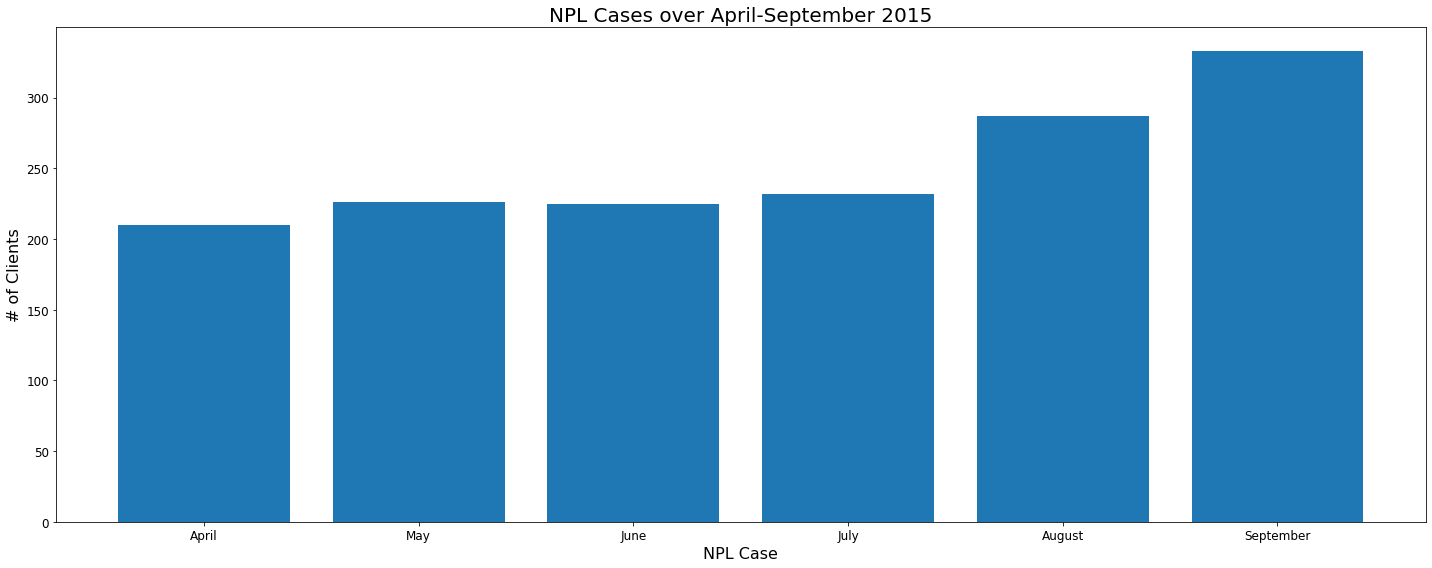

In [ ]:
plt.figure(figsize=(20,8))
plt.bar(NPL_dat['Month'], NPL_dat['NPL'])
plt.xlabel("NPL Case", fontsize=16)
plt.ylabel("# of Clients", fontsize=16)
plt.xticks(NPL_dat.Month.values, fontsize=12)

plt.title("NPL Cases over April-September 2015", fontsize=20)
save_fig("NPL Cases over April-September 2015")
plt.show()

Above graph showing increase in NPL Cases from April to September 2015. Meanwhile in May and June, the case remains constant.

**5. Marital Status Correlation to Risk Payment**

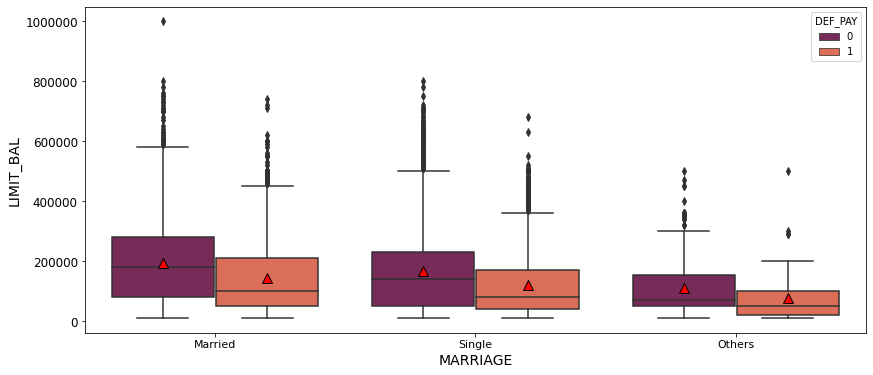

Saving figure Marital Status vs Credit Limit vs Default


<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(14,6))

sns.boxplot(x = "MARRIAGE", y = "LIMIT_BAL", hue = 'DEF_PAY', data = data, palette = 'rocket', showmeans=True, 
            meanprops={"markerfacecolor":"red",  "markeredgecolor":"black", "markersize":"10"})

plt.ticklabel_format(style='plain', axis='y') #repressing scientific notation   
plt.xticks([0,1,2],['Married','Single','Others'], fontsize = 11)

plt.show()
save_fig("Marital Status vs Credit Limit vs Default")

Married client has higher limit balance than other category. However marital status did not really have an impact to default prediction, as all status have similar proportion between non default and default.

**6. Data Correlation**

Based on correlation heatmap, default payment influenced by repayment status (positively related) and limit balance (negatively related).
To predict default payment, we will only select them.

Saving figure Data_Correlation_Heatmap


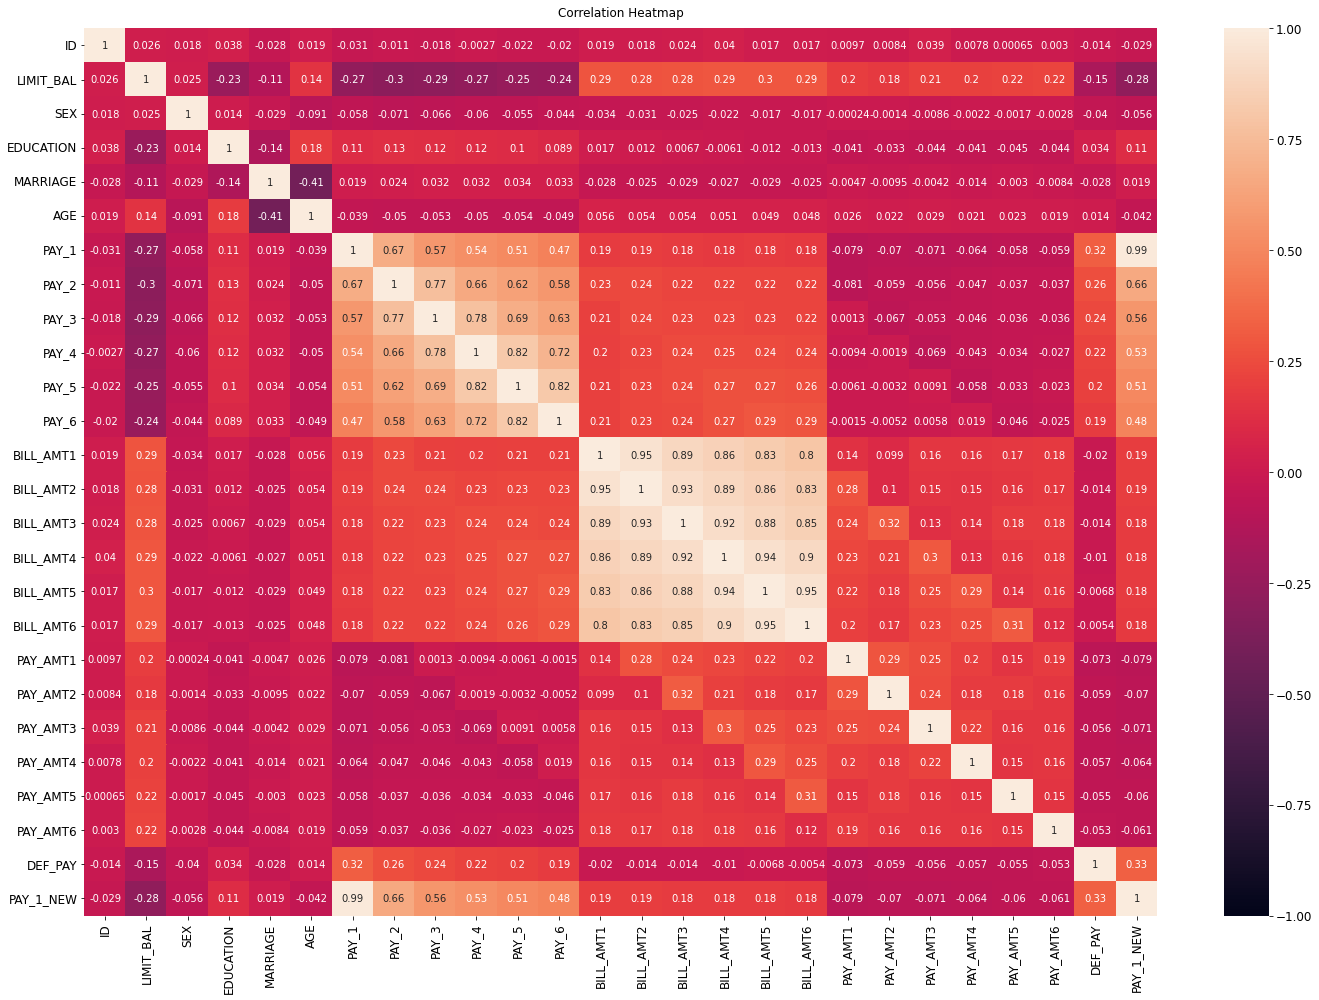

In [ ]:
plt.figure(figsize=(20, 14))

heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

save_fig('Data_Correlation_Heatmap')

# Data Preprocessing

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
X = data[['LIMIT_BAL','MARRIAGE','PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']]
y = data[['DEF_PAY']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42, stratify=y)

In [ ]:
y_train.shape

(24000, 1)

In [ ]:
y_test.shape

(6000, 1)

In this section, we are selecting features that will be used to predict default payment into 'X' and the target feature into 'y'. And then we split the dataset with 80:20 proportion (80% data for training purpose, 20% data for testing purpose).

# Transformer Pipeline

To simplify preprocessing step, we will create a pipeline below:

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class OldDataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

num_attribs = ['LIMIT_BAL','MARRIAGE','PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
data_label = ['DEF_PAY']

pipeline = Pipeline([
                         ('selector', OldDataFrameSelector(num_attribs)),
                         ('scaler', MinMaxScaler())                   
])

In [ ]:
data_train_prepared = pipeline.fit_transform(X_train)
data_train_prepared

array([[0.15151515, 0.5       , 0.4       , ..., 0.4       , 0.2       ,
        0.2       ],
       [0.14141414, 0.5       , 0.3       , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.3       , ..., 0.2       , 0.2       ,
        0.2       ],
       ...,
       [0.11111111, 0.5       , 0.2       , ..., 0.2       , 0.2       ,
        0.2       ],
       [0.35353535, 0.        , 0.3       , ..., 0.1       , 0.1       ,
        0.        ],
       [0.29292929, 0.        , 0.1       , ..., 0.1       , 0.        ,
        0.        ]])

# Model Training

## Logistic Regression

### Hyperparameter Tuning

In [ ]:
#List Hyperparameters
penalty = ['l1', 'l2']
C = [0.1 , 1, 10]

# Turn hyperparameter list to dictionary
hyperparameters = dict(penalty=penalty, C=C)

# Create Object Logistic Regression
log_reg = LogisticRegression()

# Enter into ke Grid Search
clf = GridSearchCV(log_reg, hyperparameters, cv=10)

#Fitting Model
best_model = clf.fit(pipeline.fit_transform(X_train),y_train)

#Best hyperparameters terbaik
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

#Predict using new model
y_pred = best_model.predict(pipeline.transform(X_test))

#Check model performance
print(classification_report(y_test, y_pred))
print("AUC Score:",roc_auc_score(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

Best Penalty: l2
Best C: 10
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4673
           1       0.70      0.24      0.36      1327

    accuracy                           0.81      6000
   macro avg       0.76      0.60      0.62      6000
weighted avg       0.79      0.81      0.77      6000

AUC Score: 0.6048906713050053


After fine tuning the hyperparameter, then we input the best parameter into model.

In [ ]:
logreg = LogisticRegression(penalty='l2',C=10, random_state=42)

In [ ]:
logreg.fit(data_train_prepared,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
lr_predict=logreg.predict(pipeline.transform(X_test))

In [ ]:
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression model:",lr_acc_score*100,'\n')
print("AUC Score:",roc_auc_score(y_test, lr_predict),'\n')
print(classification_report(y_test,lr_predict))

confussion matrix
[[4537  136]
 [1010  317]]


Accuracy of Logistic Regression model: 80.9 

AUC Score: 0.6048906713050053 

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4673
           1       0.70      0.24      0.36      1327

    accuracy                           0.81      6000
   macro avg       0.76      0.60      0.62      6000
weighted avg       0.79      0.81      0.77      6000



## Support Vector Machine

### Hyperparameter Tuning

In [ ]:
#List Hyperparameters
C = [0.1 , 1, 10]
kernel = ['rbf', 'poly', 'sigmoid']

# Turn hyperparameter list to dictionary
hyperparameters = dict(C=C, kernel=kernel)

# Create Object Logistic Regression
svc_trial = SVC()

# Enter into ke Grid Search
clf2 = GridSearchCV(svc_trial, hyperparameters, cv=5)

#Fitting Model
best_model2 = clf2.fit(pipeline.fit_transform(X_train),y_train)

#Best hyperparameters terbaik
print('Best C:', best_model2.best_estimator_.get_params()['C'])
print('Best kernel:', best_model2.best_estimator_.get_params()['kernel'])

#Predict using new model
y_pred2 = best_model2.predict(pipeline.transform(X_test))

#Check model performance
print(classification_report(y_test, y_pred2))
print("AUC Score:",roc_auc_score(y_test, y_pred2))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Best C: 1
Best kernel: rbf
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.66      0.36      0.46      1327

    accuracy                           0.82      6000
   macro avg       0.75      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000

AUC Score: 0.6523281220292431


After fine tuning the hyperparameter, then we input the best parameter into model.

In [ ]:
svm = SVC(C=1, kernel='rbf', random_state=42)

In [ ]:
svm.fit(data_train_prepared,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
svm_predict=svm.predict(pipeline.transform(X_test))

In [ ]:
svm_conf_matrix = confusion_matrix(y_test, svm_predict)
svm_acc_score = accuracy_score(y_test, svm_predict)
print("confussion matrix")
print(svm_conf_matrix)
print("\n")
print("Accuracy of Support Vector Machine model:",svm_acc_score*100,'\n')
print("AUC Score:",roc_auc_score(y_test, svm_predict),'\n')
print(classification_report(y_test,svm_predict))


confussion matrix
[[4431  242]
 [ 854  473]]


Accuracy of Support Vector Machine model: 81.73333333333333 

AUC Score: 0.6523281220292431 

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.66      0.36      0.46      1327

    accuracy                           0.82      6000
   macro avg       0.75      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000



## Decision Tree

### Hyperparameter Tuning

In [ ]:
#List Hyperparameters
criterion = ['gini', 'entropy']
max_depth = [3, 5, 10, 100]

# Turn hyperparameter list to dictionary
hyperparameters = dict(criterion=criterion, max_depth=max_depth)

# Create Object Logistic Regression
dt_trial = tree.DecisionTreeClassifier()

# Enter into ke Grid Search
clf3 = GridSearchCV(dt_trial, hyperparameters, cv=5)

#Fitting Model
best_model3 = clf3.fit(pipeline.fit_transform(X_train),y_train)

#Best hyperparameters terbaik
print('Best criterion:', best_model3.best_estimator_.get_params()['criterion'])
print('Best max depth:', best_model3.best_estimator_.get_params()['max_depth'])

#Predict using new model
y_pred3 = best_model3.predict(pipeline.transform(X_test))

#Check model performance
print(classification_report(y_test, y_pred3))
print("AUC Score:",roc_auc_score(y_test, y_pred3))

Best criterion: entropy
Best max depth: 5
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.66      0.34      0.45      1327

    accuracy                           0.82      6000
   macro avg       0.75      0.65      0.67      6000
weighted avg       0.80      0.82      0.79      6000

AUC Score: 0.6467786774252383


After fine tuning the hyperparameter, then we input the best parameter into model.

In [ ]:
dt = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [ ]:
dt.fit(data_train_prepared, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
dt_predict=dt.predict(pipeline.transform(X_test))

In [ ]:
dt_conf_matrix = confusion_matrix(y_test, dt_predict)
dt_acc_score = accuracy_score(y_test, dt_predict)
print("confussion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of Decision Tree model:",dt_acc_score*100,'\n')
print("AUC Score:",roc_auc_score(y_test, dt_predict),'\n')
print(classification_report(y_test,dt_predict))

confussion matrix
[[4439  234]
 [ 871  456]]


Accuracy of Decision Tree model: 81.58333333333333 

AUC Score: 0.6467786774252383 

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.66      0.34      0.45      1327

    accuracy                           0.82      6000
   macro avg       0.75      0.65      0.67      6000
weighted avg       0.80      0.82      0.79      6000



## Random Forest

### Hyperparameter Tuning

In [ ]:
#List Hyperparameters
max_depth = [10,50,100]
n_estimators = [100,500,1000]
min_samples_leaf = [1, 2, 4]

# Turn hyperparameter list to dictionary
hyperparameters = dict(min_samples_leaf=min_samples_leaf, max_depth=max_depth, n_estimators=n_estimators)

# Create Object Logistic Regression
rf_trial = RandomForestClassifier()

# Enter into ke Grid Search
clf4 = GridSearchCV(rf_trial, hyperparameters, cv=5)

#Fitting Model
best_model4 = clf4.fit(pipeline.fit_transform(X_train),y_train)

#Best hyperparameters terbaik
print('Best min samples leaf:', best_model4.best_estimator_.get_params()['min_samples_leaf'])
print('Best max depth:', best_model4.best_estimator_.get_params()['max_depth'])
print('Best n estimators:', best_model4.best_estimator_.get_params()['n_estimators'])

#Predict using new model
y_pred4 = best_model4.predict(pipeline.transform(X_test))

#Check model performance
print(classification_report(y_test, y_pred4))
print("AUC Score:",roc_auc_score(y_test, y_pred4))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

Best min samples leaf: 2
Best max depth: 10
Best n estimators: 500
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.66      0.35      0.46      1327

    accuracy                           0.82      6000
   macro avg       0.75      0.65      0.67      6000
weighted avg       0.80      0.82      0.79      6000

AUC Score: 0.6502859747937091


After fine tuning the hyperparameter, then we input the best parameter into model.

In [ ]:
rf = RandomForestClassifier(min_samples_leaf=4, max_depth=10, n_estimators=500, random_state=42)

In [ ]:
rf.fit(data_train_prepared, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
rf_predict=rf.predict(pipeline.transform(X_test))

In [ ]:
rf_conf_matrix = confusion_matrix(y_test, rf_predict)
rf_acc_score = accuracy_score(y_test, rf_predict)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest model:",rf_acc_score*100,'\n')
print("AUC Score:",roc_auc_score(y_test, rf_predict),'\n')
print(classification_report(y_test,rf_predict))

confussion matrix
[[4429  244]
 [ 845  482]]


Accuracy of Random Forest model: 81.85 

AUC Score: 0.6555052344990082 

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.66      0.36      0.47      1327

    accuracy                           0.82      6000
   macro avg       0.75      0.66      0.68      6000
weighted avg       0.80      0.82      0.80      6000



## K-Nearest Neighbors

### Hyperparameter Tuning

In [ ]:
#List Hyperparameters
leaf_size = [1, 5, 7]
n_neighbors = [3, 5, 10]
p=[1,2]

# Turn hyperparameter list to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

# Create Object Logistic Regression
knn_trial = KNeighborsClassifier()

# Enter into ke Grid Search
clf5 = GridSearchCV(knn_trial, hyperparameters, cv=5)

#Fitting Model
best_model5 = clf5.fit(pipeline.fit_transform(X_train),y_train)

#Best hyperparameters terbaik
print('Best leaf size:', best_model5.best_estimator_.get_params()['leaf_size'])
print('Best n neighbors:', best_model5.best_estimator_.get_params()['n_neighbors'])
print('Best p:', best_model5.best_estimator_.get_params()['p'])

#Predict using new model
y_pred5 = best_model5.predict(pipeline.transform(X_test))

#Check model performance
print(classification_report(y_test, y_pred5))
print("AUC Score:",roc_auc_score(y_test, y_pred5))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

Best leaf size: 5
Best n neighbors: 10
Best p: 1
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      4673
           1       0.67      0.31      0.43      1327

    accuracy                           0.81      6000
   macro avg       0.75      0.63      0.66      6000
weighted avg       0.79      0.81      0.79      6000

AUC Score: 0.6340052387724636


After fine tuning the hyperparameter, then we input the best parameter into model.

In [ ]:
knn = KNeighborsClassifier(leaf_size=5, n_neighbors=10, p=1)

In [ ]:
knn.fit(data_train_prepared, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=5, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=1,
                     weights='uniform')

In [ ]:
knn_predict=knn.predict(pipeline.transform(X_test))

In [ ]:
knn_conf_matrix = confusion_matrix(y_test, knn_predict)
knn_acc_score = accuracy_score(y_test, knn_predict)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of K-Nearest Neighbors model:",knn_acc_score*100,'\n')
print("AUC Score:",roc_auc_score(y_test, knn_predict),'\n')
print(classification_report(y_test,knn_predict))

confussion matrix
[[4464  209]
 [ 912  415]]


Accuracy of K-Nearest Neighbors model: 81.31666666666668 

AUC Score: 0.6340052387724636 

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      4673
           1       0.67      0.31      0.43      1327

    accuracy                           0.81      6000
   macro avg       0.75      0.63      0.66      6000
weighted avg       0.79      0.81      0.79      6000



# Model Evaluation

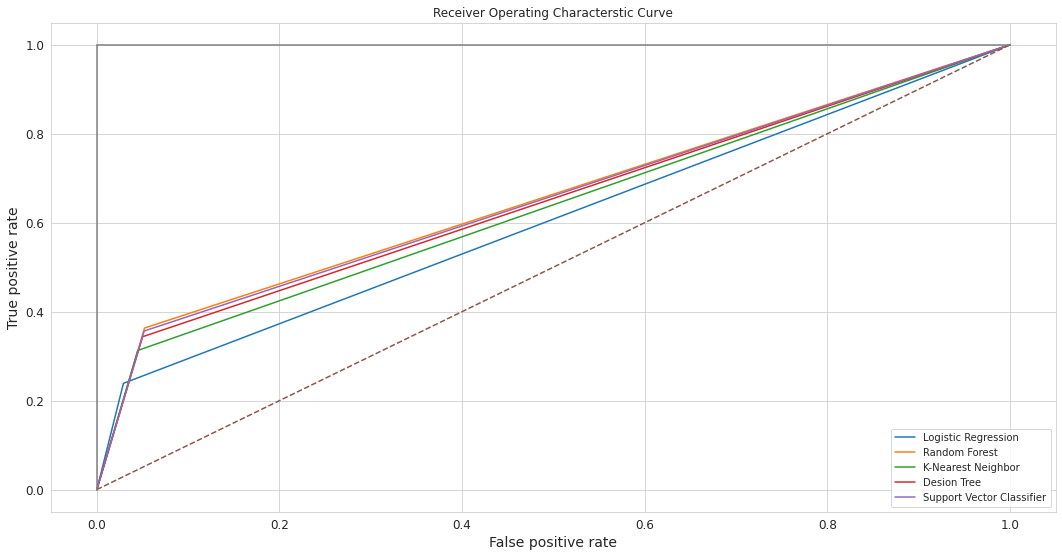

In [ ]:
lr_false_positive_rate,lr_true_positive_rate,lr_threshold = roc_curve(y_test,lr_predict)
rf_false_positive_rate,rf_true_positive_rate,rf_threshold = roc_curve(y_test,rf_predict)                                                             
knn_false_positive_rate,knn_true_positive_rate,knn_threshold = roc_curve(y_test,knn_predict)
dt_false_positive_rate,dt_true_positive_rate,dt_threshold = roc_curve(y_test,dt_predict)
svm_false_positive_rate,svm_true_positive_rate,svm_threshold = roc_curve(y_test,svm_predict)


sns.set_style('whitegrid')
plt.figure(figsize=(18,9))
plt.title('Receiver Operating Characterstic Curve')
plt.plot(lr_false_positive_rate,lr_true_positive_rate,label='Logistic Regression')
plt.plot(rf_false_positive_rate,rf_true_positive_rate,label='Random Forest')
plt.plot(knn_false_positive_rate,knn_true_positive_rate,label='K-Nearest Neighbor')
plt.plot(dt_false_positive_rate,dt_true_positive_rate,label='Desion Tree')
plt.plot(svm_false_positive_rate,svm_true_positive_rate,label='Support Vector Classifier')
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

Based on AUC Score, the optimum models is Random Forest which has the highest AUC Score. In this case, we are going to look for model that has high recall also in order to minimize False Negative result.

In [ ]:
# Logistic Regression
logreg_scores= cross_val_score(log_reg, data_train_prepared, y_train, cv=5)
logreg_mean= logreg_scores.mean()
logreg_prec =classification_report(y_test, lr_predict, output_dict=True)['1']['precision']
logreg_rec = classification_report(y_test, lr_predict, output_dict=True)['1']['recall']

# Support Vector Machine
svm_scores= cross_val_score(svm, data_train_prepared, y_train, cv=5)
svm_mean= svm_scores.mean()
svm_prec =classification_report(y_test, svm_predict, output_dict=True)['1']['precision']
svm_rec = classification_report(y_test, svm_predict, output_dict=True)['1']['recall']

# Decision Tree
dt_scores= cross_val_score(dt, data_train_prepared, y_train, cv=5)
dt_mean= dt_scores.mean()
dt_prec =classification_report(y_test, dt_predict, output_dict=True)['1']['precision']
dt_rec = classification_report(y_test, dt_predict, output_dict=True)['1']['recall']

# Random Forest
rf_scores= cross_val_score(rf, data_train_prepared, y_train, cv=5)
rf_mean= rf_scores.mean()
rf_prec =classification_report(y_test, rf_predict, output_dict=True)['1']['precision']
rf_rec = classification_report(y_test, rf_predict, output_dict=True)['1']['recall']

# K-Nearest Neighbors
knn_scores= cross_val_score(knn, data_train_prepared, y_train, cv=5)
knn_mean= knn_scores.mean()
knn_prec =classification_report(y_test, knn_predict, output_dict=True)['1']['precision']
knn_rec = classification_report(y_test, knn_predict, output_dict=True)['1']['recall']

# Create dataframe with results
g = {'Classifiers':['Logistis Reg.','SVC','Decision Tree', 'Random Forest',
                    'KNN'],
     'Crossval Mean Scores':[logreg_mean, svm_mean, dt_mean, rf_mean, knn_mean],
     'Precision': [logreg_prec, svm_prec, dt_prec, rf_prec, knn_prec],
     'Recall': [logreg_rec, svm_rec, dt_rec, rf_rec, knn_rec]
     }

result_df = pd.DataFrame(data=g)
result_df = result_df.sort_values(by=['Crossval Mean Scores'],ascending=False)
result_df

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

,Classifiers,Crossval Mean Scores,Precision,Recall
3,Random Forest,0.821917,0.663912,0.363225
2,Decision Tree,0.821667,0.660870,0.343632
1,SVC,0.821208,0.661538,0.356443
4,KNN,0.813208,0.665064,0.312735
0,Logistis Reg.,0.810292,0.699779,0.238885


Based on AUC Score and Recall, we can conclude that Random Forest is the optimum one, then we will save the model in pickle.

# Model Saving

In [ ]:
full_pipeline_with_predictor = Pipeline([
        ("preparation", pipeline),
        ("random forest", RandomForestClassifier(min_samples_leaf=4, max_depth=10, n_estimators=500, random_state=42))
    ])

full_pipeline_with_predictor.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:354: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


Pipeline(memory=None,
         steps=[('preparation',
                 Pipeline(memory=None,
                          steps=[('selector',
                                  OldDataFrameSelector(attribute_names=['LIMIT_BAL',
                                                                        'MARRIAGE',
                                                                        'PAY_1',
                                                                        'PAY_2',
                                                                        'PAY_3',
                                                                        'PAY_4',
                                                                        'PAY_5',
                                                                        'PAY_6'])),
                                 ('scaler',
                                  MinMaxScaler(copy=True,
                                               feature_range=(0, 1)))],
                          ver

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
pipeline_with_predictor = Pipeline([
        ("scaler", MinMaxScaler()),
        ("random forest", RandomForestClassifier(min_samples_leaf=4, max_depth=10, n_estimators=500, random_state=42))
    ])

pipeline_with_predictor.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:354: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


Pipeline(memory=None,
         steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('random forest',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=10, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=4, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=500, n_jobs=None,
                                        oob_score=False, random_state=42,
                                        verbose=0, warm_start=False))],
         verbose=False)

In [ ]:
rf_model = pipeline_with_predictor

In [ ]:
my_model = full_pipeline_with_predictor

In [ ]:
import joblib
joblib.dump(my_model, "my_model.pkl") # DIFF
#...
my_model_loaded = joblib.load("my_model.pkl") # DIFF

In [ ]:
import pickle
pickle.dump(rf_model, open('model.pkl', 'wb'))

# Model Inference

In Model Inference, we will pick 3 sample from data test to predict default payment. All 3 client is already married, client 1 and client to has limit balance 50,000 NT Dollar and fully paid their bill. Meanwhile Client 2 has limit balance 600,000 NT Dollar and the payment is delay 2 month.

In [ ]:
some_data = X_test.sample(3)
some_data

,LIMIT_BAL,MARRIAGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
20639,260000.0,1,0,0,3,2,2,2
7660,80000.0,2,2,0,0,0,-2,-2
13980,360000.0,2,-2,-2,-2,-2,-2,-2


In [ ]:
full_pipeline_with_predictor.predict(some_data)

array([0, 1, 0])

In [ ]:
pipeline_with_predictor.predict(some_data)

array([0, 1, 0])

Model predicts client1 and 2 as credible client since both already fully paid the bill in the last 5 months. Client 3 is predicted as non-credible client due to 2 month delay payment in the last 3 months.

# Conclusion

1. Default payment in this case is 22.1% of Total Credit. To be successful in the long run, banks need to keep the level of bad loans at a minimum so they can still earn a profit from extending new loans to customers. Predicting default could help bank handling potential NPL in the future.

2. A nonperforming loan (NPL) is a loan in which the borrower is default and hasn't made any scheduled payments of principal or interest for some time.
In banking, commercial loans are considered nonperforming if the borrower is 90 days past due. In this case The Bank has 1.11% of NPL as per September 2005.
The number is continuosly increasing sice April 2005 from 210 case to 333 case.  

3. Based on correlation heatmap, features that can help predict default is  repayment status (positively related) and limit balance (negatively related). Meanwhile marital status has weak relationship towards default payment. Therefore payment pattern could be learned by the models based on repayment status.

4. For creating optimum model, we need model that can predict true default case (high True Positive) and low false negative prediction. So we can capture as many potential default payment in front and the investigation team can deep dive which case is the true default case. Therefore, we will focus on evaluating model based on AUC score and Recall.

5. Random Forest with tuned hyperparameter, has the highest AUC Score, Recall Score, as well as the accuracy.


In [ ]:
print("Accuracy of Random Forest after Tuning:",rf_acc_score*100,'\n')
print("AUC Score:",roc_auc_score(y_test, rf_predict),'\n')
print(classification_report(y_test,rf_predict))

Accuracy of Random Forest after Tuning: 81.85 

AUC Score: 0.6555052344990082 

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.66      0.36      0.47      1327

    accuracy                           0.82      6000
   macro avg       0.75      0.66      0.68      6000
weighted avg       0.80      0.82      0.80      6000

